In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame

In [2]:
df = pd.read_csv("data.csv", sep=',')
df["life time"] = df["report.date"] - df["production.date"]

In [3]:
tww = 0
twh = 0
tdw = 0
tdh = 0

num_per_m = np.zeros((6,2))
def_per_m = np.zeros((7,2))
def_per_m2 = np.zeros((7,2))

for i in range(df.shape[0]):
    if df.iloc[i][5] == "harpy.co":
        twh += df.iloc[i][3]
        tdh += df.iloc[i][4]
        num_per_m[df.iloc[i][1]-1][0] += df.iloc[i][3]
        def_per_m[df.iloc[i][6]][0] += df.iloc[i][4]
        def_per_m2[df.iloc[i][6]][0] += df.iloc[i][4]
    
    if df.iloc[i][5] == "westeros.inc":
        tww += df.iloc[i][3]
        tdw += df.iloc[i][4]
        num_per_m[df.iloc[i][1]-1][1] += df.iloc[i][3]
        def_per_m[df.iloc[i][6]][1] += df.iloc[i][4]
        def_per_m2[df.iloc[i][6]][1] += df.iloc[i][4]

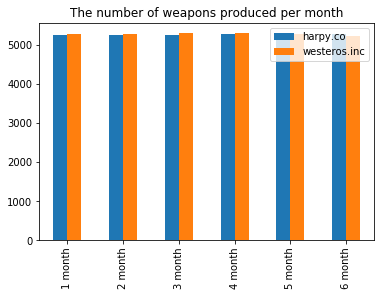

In [4]:
info_per_m = DataFrame(num_per_m, index=['1 month', '2 month','3 month','4 month','5 month','6 month'],columns=['harpy.co','westeros.inc'])
info_per_m.plot(title="The number of weapons produced per month", kind='bar')

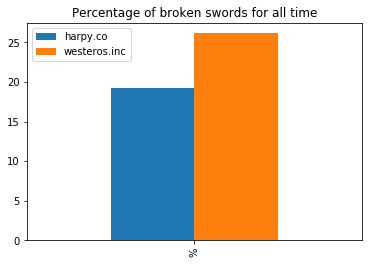

In [5]:
x = np.zeros((1,2))
x[0][0] = 100*tdh/twh
x[0][1] = 100*tdw/tww
DataFrame(x, index=["%"], columns=['harpy.co','westeros.inc']).plot(title="Percentage of broken swords for all time",kind="bar")

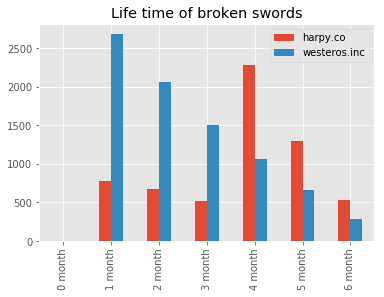

In [6]:
df1=DataFrame(def_per_m, index=['0 month','1 month', '2 month','3 month','4 month','5 month','6 month'],columns=['harpy.co','westeros.inc'])
plt.style.use('ggplot')
df1.plot(title="Life time of broken swords", kind="bar")

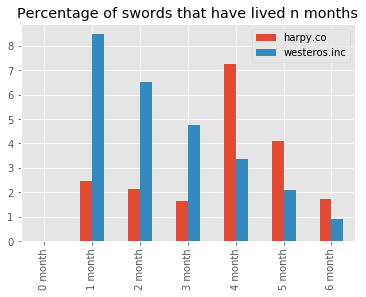

In [7]:
for i in range(7):
    def_per_m[i][0] = 100*def_per_m[i][0]/twh
    def_per_m[i][1] = 100*def_per_m[i][1]/tww
df1=DataFrame(def_per_m, index=['0 month','1 month', '2 month','3 month','4 month','5 month','6 month'],columns=['harpy.co','westeros.inc'])
plt.style.use('ggplot')
df1.plot(title="Percentage of swords that have lived n months", kind="bar")

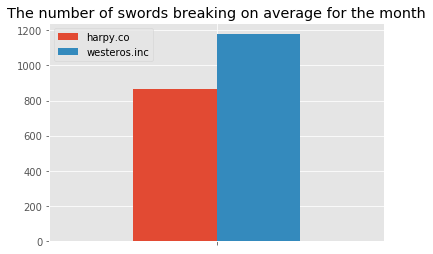

In [8]:
mid = np.zeros((1,2))
for i in range(7):
    mid[0][0] += def_per_m2[i][0]
    mid[0][1] += def_per_m2[i][1]
mid[0][0] /= 7
mid[0][1] /= 7


df1=DataFrame(mid, index=[""], columns=['harpy.co','westeros.inc'])
plt.style.use('ggplot')
df1.plot(title="The number of swords breaking on average for the month", kind="bar")